<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


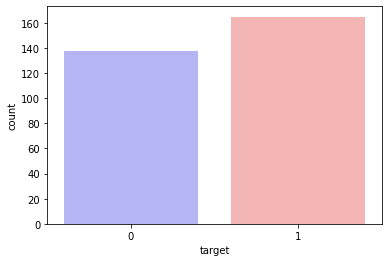

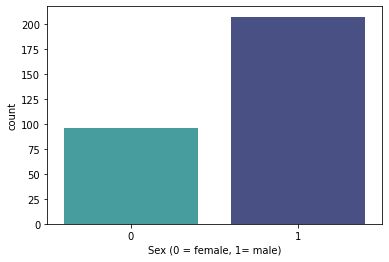

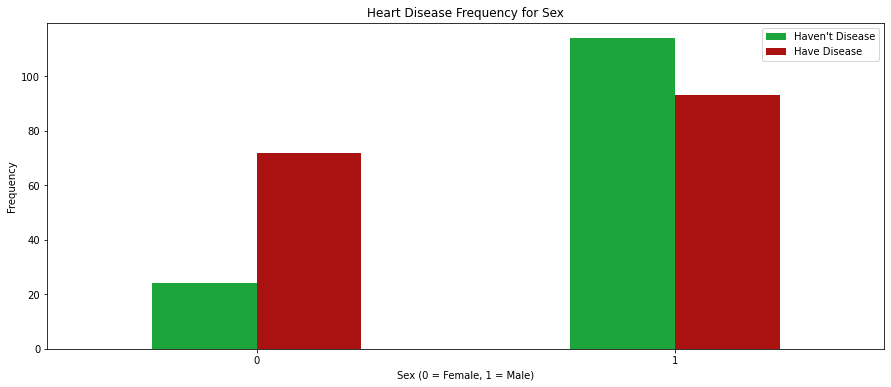

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
df = pd.read_csv("C:/Users/tonyekas/Documents/School/UoC-Machine-Python/HeartDiseaseClassifier/heart.csv")
# use the following line to look into the first 5 records in the data
df.head()
# use the following line of code to check the info of the dataset columns and check for missing lines
df.info()
# use the following line of code to check the means/quantiles of the numeric columns
df.describe()
# use following line to check the distribution of the target (How many have heart diseases?)
df.target.value_counts()
# plot target counts
sns.countplot(x="target", data=df, palette="bwr")
plt.show()
# plot counts based on gender
sns.countplot(x='sex', data=df, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()
# the following lines of code will analyze gender Vs Target (You can add more analyses from your side inspired by this analysis)
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")
df = pd.concat([df,a,b,c], axis = 1)
df = df.drop(columns = ['cp', 'thal', 'slope'])
y = df.target.values
X = df.drop(['target'], axis = 1)
#Scaling the Data 
#-	Use Standard Scaler to scale all columns of the data




from tkinter import *
import tkinter as tk



def check_inputs():
    if age.get() == "":
        print("Age Field is Empty!!")
        Label(win,text="Age Field is Empty!!",fg="blue",bg="yellow",font = ("Calibri 10 bold")).place(x=12,y=580)


    elif rbp.get() == "":
        print("Resting Blood Pressure Field is Empty!!")
        Label(win,text="Resting Blood Pressure Field is Empty!!",fg="blue",bg="yellow",font = ("Calibri 10 bold")).place(x=12,y=580)

    elif chol.get() == "":
        print("Cholestrol Field is Empty!!")
        Label(win,text="Cholestrol Field is Empty!!",fg="blue",bg="yellow",font = ("Calibri 10 bold")).place(x=12,y=580)

    elif heart_rate.get() == "":
        print("Heart Rate Field is Empty!!")
        
        Label(win,text="Heart Rate Field is Empty!!",fg="blue",bg="yellow",font = ("Calibri 10 bold")).place(x=12,y=580)
    elif peak.get() == "":
        print("Depression By Exercise Field is Empty!!")
        Label(win,text="Depression By Exercise Field is Empty!!",fg="blue",bg="yellow",font = ("Calibri 10 bold")).place(x=12,y=580)

    else:
        predict()


def predict():
    gender_dict = {"Male":1, "Female":0}
    fbs_dict = {"True":1, "False":0}
    eia_dict = {"True":1, "False":0}
    cp_dict = {"1: typical angina":0,"2: atypical angina":1,"3: non-anginal pain":2,"4: asymptomatic":3}
    thal_dict = {"0: No Test":0,"1: Fixed Defect":1,"2: Normal Flow":2,"3: Reversible Defect":3}
    Pred_dict = {0:"Prediction: No Heart Disease Detected", 1:"Prediction: Signs of Heart Disease Deteced\nYou should consult with your Doctor!"}
    
    data = [float(age.get()),gender_dict[str(radio.get())], cp_dict[str(variable.get())], float(rbp.get()),
           float(chol.get()),fbs_dict[str(radio_fbs.get())], int(str(variable_ecg.get())) - 1 , float(heart_rate.get()),
           eia_dict[str(radio_eia.get())], float(peak.get()), int(str(variable_slope.get())) - 1,int(str(variable_n_vessels.get())) - 1,
           thal_dict[str(variable_thal.get())]]

    prediction = Final_Model.predict(np.array(data).reshape(1,13))
    pred_label = Pred_dict[prediction.tolist()[0]]
    Label(win,text=pred_label,fg="blue",bg="yellow",font = ("Calibri 10 bold")).place(x=12,y=580)



def reset():
    age.set("")
    rbp.set("")
    chol.set("")
    heart_rate.set("")
    peak.set("")




win =  Tk()

win.geometry("450x600")
win.configure(background="#Eaedee")
win.title("Heart Disease Classifier")
# win.iconbitmap('icon.ico')

title = Label(win, text="Heart Disease Classifier", bg="#2583be", width="300", height="2", fg="white", font = ("Arial 20 italic")).pack()

age = Label(win, text="Age in Years", bg="#Eaedee", font=("Verdana 12")).place(x=12, y=65)

rbp = Label(win, text="Resting Blood Pressure ", bg="#Eaedee", font=("Verdana 12")).place(x=12, y=105)

chol = Label(win, text="Cholestrol mg/dl ", bg="#Eaedee", font=("Verdana 12")).place(x=12, y=145)

heart_rate = Label(win, text="Maximum Heart Rate ", bg="#Eaedee", font=("Verdana 12")).place(x=12, y=185)

peak = Label(win, text="Depression By Exercise ",bg="#Eaedee",font = ("Verdana 12")).place(x=12,y=225)


  
Gender = Label(win, text="Gender ",bg="#Eaedee",font = ("Verdana 12")).place(x=12,y=265)

radio = StringVar()
Male = Radiobutton(win, text="Male",bg="#Eaedee",variable=radio,value="Male",font = ("Verdana 12")).place(x=160,y=265)
Female = Radiobutton(win, text="Female",bg="#Eaedee",variable=radio,value="Female",font = ("Verdana 12")).place(x=260,y=265)

FBS = Label(win, text="Fasting Blood Pressure ",bg="#Eaedee",font = ("Verdana 12")).place(x=12,y=285)

radio_fbs = StringVar()
Male = Radiobutton(win, text="True",bg="#Eaedee",variable=radio_fbs,value="True",font = ("Verdana 12")).place(x=160,y=285)
Female = Radiobutton(win, text="False",bg="#Eaedee",variable=radio_fbs,value="False",font = ("Verdana 12")).place(x=260,y=285)

EIA = Label(win, text="Exercise Induced Angina",bg="#Eaedee",font = ("Verdana 12")).place(x=12,y=305)

radio_eia = StringVar()
Male = Radiobutton(win, text="True",bg="#Eaedee",variable=radio_eia,value="True",font = ("Verdana 12")).place(x=160,y=305)
Female = Radiobutton(win, text="False",bg="#Eaedee",variable=radio_eia,value="False",font = ("Verdana 12")).place(x=260,y=305)


cp = Label(win,text="Chest Pain ",bg="#Eaedee",font = ("Verdana 12")).place(x=12,y=345)
variable = StringVar(win)
variable.set("CP")
w = OptionMenu(win, variable, "1: typical angina","2: atypical angina","3: non-anginal pain","4: asymptomatic")
w.place(x=140,y=345)

ecg = Label(win,text="Resting ECG ",bg="#Eaedee",font = ("Verdana 12")).place(x=12,y=385)
variable_ecg = StringVar(win)
variable_ecg.set("ECG")
w_ecg = OptionMenu(win, variable_ecg, "1","2","3")
w_ecg.place(x=140,y=385)


exer_slope = Label(win,text="Slope of Exercise ",bg="#Eaedee",font = ("Verdana 12")).place(x=12,y=425)
variable_slope = StringVar(win)
variable_slope.set("Slope")
w_slope = OptionMenu(win, variable_slope, "1","2","3")
w_slope.place(x=140,y=425)


thal_label = Label(win,text="Thallium Stress ",bg="#Eaedee",font = ("Verdana 12")).place(x=12,y=465)
variable_thal = StringVar(win)
variable_thal.set("Thal")
w_thal = OptionMenu(win, variable_thal, "0: No Test","1: Fixed Defect","2: Normal Flow","3: Reversible Defect")
w_thal.place(x=140,y=465)


n_vessels = Label(win,text="Number Vessels ",bg="#Eaedee",font = ("Verdana 12")).place(x=12,y=505)
variable_n_vessels = StringVar(win)
variable_n_vessels.set("N_Vessels")
w_n_vessels = OptionMenu(win, variable_n_vessels, "1","2","3","4")
w_n_vessels.place(x=140,y=505)


age = StringVar()
rbp = StringVar()
chol = StringVar()
heart_rate = StringVar()
peak  = StringVar()
Gender = StringVar()
FBS  = StringVar()
EIA  = StringVar()
cp  = StringVar()
ecg  = StringVar()
exer_slope  = StringVar()
thal_label  = StringVar()
n_vessels  = StringVar()

entry_age = Entry(win,textvariable = age,width=30)
entry_age.place(x=150,y=65)

entry_rbp = Entry(win,textvariable = rbp,width=30)
entry_rbp.place(x=150,y=105)

entry_chol = Entry(win,textvariable = chol,width=30)
entry_chol.place(x=150,y=145)

entry_heart_rate = Entry(win, textvariable = heart_rate,width=30)
entry_heart_rate.place(x=150,y=185)

entry_peak = Entry(win,textvariable = peak,width=30)
entry_peak.place(x=150,y=225)

reset = Button(win, text="Reset", width="12",height="1",activebackground="red",command=reset, bg="Pink",font = ("Calibri 12 ")).place(x=24, y=540)
submit = Button(win, text="Classify", width="12",height="1",activebackground="violet", bg="Pink",command=check_inputs,font = ("Calibri 12 ")).place(x=240, y=540)


win.mainloop()
